In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
%matplotlib inline

In [8]:
path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)

In [9]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [10]:
tmp1 = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

In [12]:
response = urlopen(html.format(num=1,key_word=urllib.parse.quote('여친 선물')))
response

In [13]:
soup = BeautifulSoup(response, 'html.parser')

In [15]:
tmp = soup.find_all('dl')

In [17]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list[5]

'  질문  아빠가 어제 카드 주셔서 여친 선물   2020.02.04.   아빠가 어제 카드 주셔서 여친 선물 사는데에 20만원 썼거든요?? 근데 여친이 또 사달라는게 있는데 그게 30만원이에요... 근데 또 돈쓰면 아빠가 뭐라 할것같고 안사주면...   답변 제가 보기에는 여친이 너무 무리하게 요구하는것 같은데 무리해서도라도 사주고 싶은 건가요? 남친을 곤란하게 만드는 여친이라면 고민해 보셔야할듯 해요~사랑은 둘이...    닉네임후니맘   '

In [18]:
from tqdm import tqdm_notebook #진행바

In [27]:
present_candi_text = []
for n in tqdm_notebook(range(1,1000,10)):
    for line in tmp :
        response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))
        soup = BeautifulSoup(response, "html.parser")
        tmp = soup.find_all('dl')
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [26]:
len(present_candi_text)

1300

In [29]:
import nltk
from konlpy.tag import Okt

In [32]:
t = Okt()
present_text = ''

for each_line in present_candi_text[:len(present_candi_text)]:
    present_text = present_text + each_line + '\n'

In [33]:
# 형태소 분석
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '질문',
 '여친',
 '선물',
 '로',
 '에어',
 '맥스',
 '97',
 '데저트샌드',
 '2020.03',
 '.',
 '12',
 '.',
 '여친',
 '선물',
 '로',
 '에어',
 '맥스',
 '97',
 '데저트샌드',
 '사주고싶어서',
 '그런데',
 '여기',
 '가',
 '가장',
 '믿을만한',
 '거',
 '같은데',
 '사이트',
 '정품',
 '취급',
 '하',
 '는',
 '곳',
 '인가요',
 '?',
 'https://m.smartstore.naver.com/nonshop',
 '...',
 '답변',
 '제품',
 '을',
 '받아',
 '봐야',
 '정답',
 '이',
 '나오겠는데',
 '의심',
 '이',
 '되네요',
 '패스',
 '하시는게',
 '정신건강',
 '에',
 '좋겠고',
 '다른',
 '정품',
 '사이트',
 '는',
 '메일',
 '로',
 '보내',
 '드릴테니',
 '참고',
 '하시길',
 '바랍니다',
 '.',
 '닉네임',
 '코비',
 '진스',
 '질문',
 '여친',
 '선물',
 '로',
 '뭘',
 '줘야',
 '할까',
 '

In [34]:
len(tokens_ko)

85281

In [35]:
# 형태소 => 토큰 => 실 토큰 수
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

85281
683


In [36]:
# 빈도수 확인
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

[('선물', 5272),
 ('여자친구', 4061),
 ('.', 3501),
 ('...', 2191),
 ('추천', 1983),
 ('로', 1396),
 ('답변', 1099),
 ('을', 1095),
 ('대', 1089),
 ('닉네임', 1001),
 ('질문', 1000),
 ('를', 995),
 ('이', 804),
 ('여자', 792),
 ('화장품', 792),
 ('가', 701),
 ('에', 601),
 ('요', 600),
 ('****', 597),
 ('20', 594),
 ('좀', 594),
 ('30', 594),
 ('?', 504),
 ('단어', 500),
 ('는', 500),
 ('도', 499),
 ('해주세요', 496),
 ('괜찮은', 496),
 ('검색', 400),
 ('의', 399),
 ('거', 399),
 ('한', 398),
 ('개', 398),
 ('수', 398),
 (',', 398),
 ('~', 398),
 ('저', 397),
 ('으로', 396),
 ('뷰티', 396),
 ('팩트', 396),
 ('하는데', 396),
 ('인지', 396),
 ('하는', 302),
 ('입력', 300),
 ('어떤', 299),
 ('게', 299),
 ('은', 299),
 ('것', 299),
 ('같아요', 299),
 ('된', 298),
 ('합니다', 298),
 ('여러', 298),
 ('2020.07', 298),
 ('생일', 298),
 ('(', 297),
 ('적', 297),
 ('명품', 297),
 ('!', 297),
 ('ysl', 297),
 ('해주려고', 297),
 ('위', 297),
 ('제', 202),
 ('정품', 201),
 ('목걸이', 201),
 ('!!', 201),
 ('포함', 200),
 ('때', 200),
 ('있는', 200),
 ('입니다', 200),
 ('뭐', 200),
 ('연관검색어', 200),
 

In [37]:
# similar 메서드는 같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들을 찾는다
ko.similar('여자친구')

여친


In [47]:
# 제외 단어 처리
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도',
                      '좋','1','는','로','으로','2','것','은','다',',','니다','대','들',
                      '2017','들','데','..','의','때','겠','고','게','네요','한','일','할',
                      '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ',
                      '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려',
                      '지','있','못','후','중','줄','6','과','어떤','기본','!!',
                      '단어','선물해','라고','중요한','합','가요','....','보이','네','무지','****',
                      '!','개','(',')','30','입니다','개','적','더','안녕하세요','2020.07','02']

In [48]:
tokens_ko = [each_word for each_word in tokens_ko
                            if each_word not in stop_words]

In [49]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 5272),
 ('여자친구', 4061),
 ('추천', 1983),
 ('닉네임', 1001),
 ('여자', 792),
 ('화장품', 792),
 ('해주세요', 496),
 ('괜찮은', 496),
 ('검색', 400),
 ('저', 397),
 ('뷰티', 396),
 ('팩트', 396),
 ('하는데', 396),
 ('인지', 396),
 ('입력', 300),
 ('같아요', 299),
 ('된', 298),
 ('합니다', 298),
 ('여러', 298),
 ('생일', 298),
 ('명품', 297),
 ('ysl', 297),
 ('해주려고', 297),
 ('위', 297),
 ('정품', 201),
 ('목걸이', 201),
 ('포함', 200),
 ('연관검색어', 200),
 ('하고', 199),
 ('좋을까요', 199),
 ('꽃', 198),
 ('있으면', 198),
 ('악세사리', 198),
 ('지갑', 198),
 ('향수', 198),
 ('부탁드려요', 198),
 ('종류', 198),
 ('실용', 198),
 ('인', 198),
 ('스킨', 198),
 ('이라고', 198),
 ('어떤게', 198),
 ('인거', 198),
 ('향', 198),
 ('잊을', 198),
 ('없는', 198),
 ('그', 198),
 ('경우', 198),
 ('포에버', 198),
 ('바', 198)]

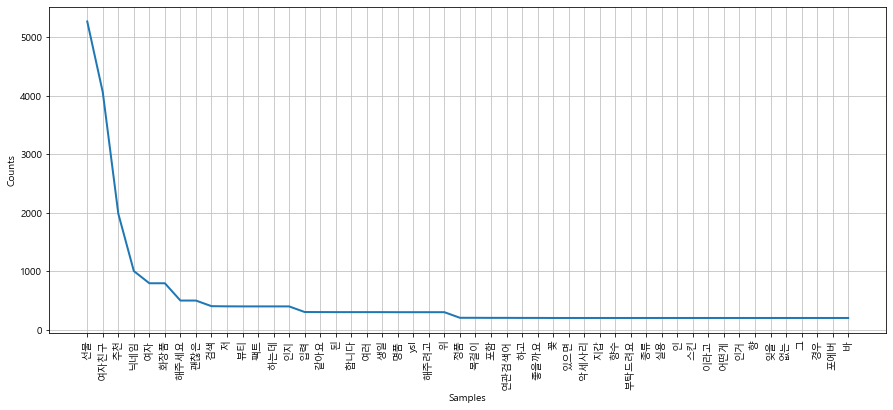

In [50]:
plt.figure(figsize=(15,6))
ko.plot(50) 
plt.show()

In [51]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [52]:
data = ko.vocab().most_common(300)

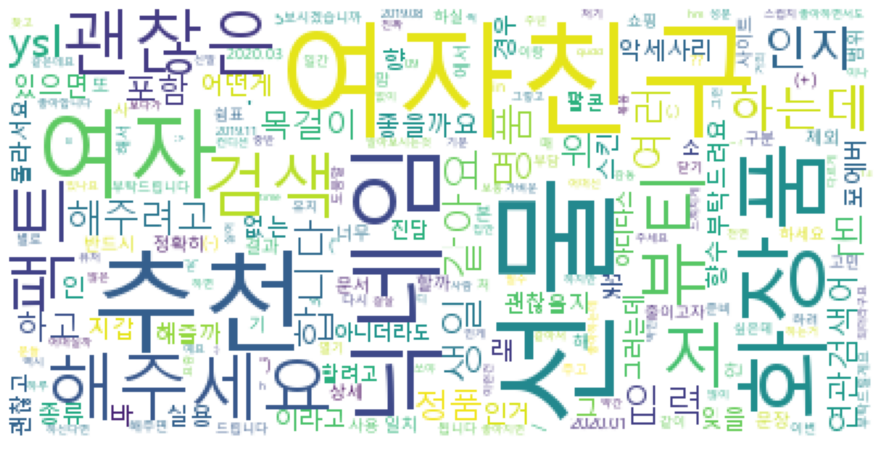

In [54]:
wc = WordCloud(font_path = path,
              relative_scaling=0.2,
              background_color='white'
              ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [56]:
mask = np.array(Image.open('DataScience_Ing/data/09. heart.jpg'))

In [57]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

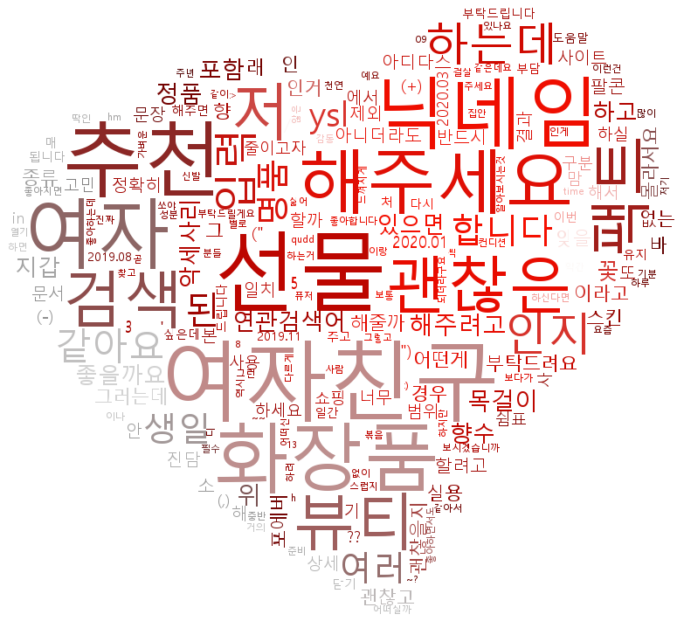

In [60]:
wc = WordCloud(font_path = path,
              relative_scaling=0.1,
              mask=mask,
              background_color='white',
              min_font_size=1,
              max_font_size=100
              ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=image_colors),interpolation='bilinear')
plt.axis("off")
plt.show()

#### gensim 사용하기
자연언어 처리하는 라이브러리

In [62]:
pip install gensim

  Created wheel for smart-open: filename=smart_open-2.1.0-py3-none-any.whl size=110324 sha256=728d9f34f56e2efd6c97c778171a0ada17da527d417ec768718a002d177fa80b
  Stored in directory: c:\users\205\appdata\local\pip\cache\wheels\56\b5\6d\86dbe4f29d4688e5163a8b8c6b740494310040286fca4dc648
  Created wheel for boto3: filename=boto3-1.14.25-py2.py3-none-any.whl size=127659 sha256=5fd4e797b2d465845aed30eda6f06f05dbc2da505a9ab443c89675612e001272
  Stored in directory: c:\users\205\appdata\local\pip\cache\wheels\bc\73\48\8b529ad1832b17e4c94e6efb98037b418c93efe74f367ff408
Successfully built smart-open boto3
Note: you may need to restart the kernel to use updated packages.


In [63]:
import gensim
from gensim.models import word2vec

In [69]:
twitter = Okt()
results = []
lines = present_candi_text

#조사 제거 작업
for line in lines:
    malist = twitter.pos(line, norm=True, stem=True)
    r = []
    
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
            
    r1 = (" ". join(r)).strip()
    results.append(r1)
    print(r1)

기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 여친 선물 에어 맥스 97 데저트샌드 2020.03 12 여친 선물 에어 맥스 97 데저트샌드 사주다 그런데 여기 가장 믿다 거 같다 사이트 정품 취급 하 곳 https://m.smartstore.naver.com/nonshop 답변 제품 받다 보다 정답 나오다 의심 되다 패스 하다 정신건강 좋다 다른 정품 사이트 메일 보내다 드리다 참고 하다 바라다 닉네임 코비 진스
질문 여친 선물 뭘 주다 하다 요 2020.05 21 여친 선물 뭘 주다 하다 요 답변 안녕하다 저 종로 3 가다 귀금속 하다 있다 예문 이다 어떻다 특별하다 날 그러면 특별하다 선물 주시 게 좋다 거 같다 기념 돌 수 있다 목걸이 반지 닉네임 Shine 09749 블로그
질문 천여 여친 선물 추 2020.06 21 천여 여친 선물 추 답변 쥬얼리 디오르 네이버 쇼핑 스마트 스토어 splendid light in your daily life m.smartstore.naver.com 닉네임 으앙
질문 아빠 어제 카드 주다 여친 선물 2020.02 04 아빠 어제 카드 주다 여친 선물 살다 20만원 써다 근데 여친 또 사 다르다 있다 그게 30만원 이에요 근데 또 돈 쓰다 아빠 뭐라다 하다 같다 안 사주다 답변 제 보기 여친 너무 무리하다 요구 하다 같다 무리하다 도라도 사주다 싶다 건가 남친 곤란하다 만들다 여친 라면 고민 하다 보다 야하다 해 사랑 둘 닉네임 후니 맘
질문 여우 님 정품 문의 답변즘 여친 선물 2020.01 29 셀렉 온 구매 하다 EATTREND 물품 배송 되어다 메종 마르지 엘라 5 AC 미니 백 부탁드리다 여친 선물 꼼꼼하다 부탁 드리다 감사하다 답변 구 매 처 링크 제품 모델 명 택 자물쇠 각인 올려주다 꼼꼼하다 확인 하다 부족

질문 여자친구 선물 2020.03 11 여자친구 선물 하다 하다 이번 신입생 도움 되다 선물 하다 하다 어떻다 좋다 답변 안녕하다 소 진담 신 사 점 이다 화이트데이 앞두다 달달 근사하다 케익 선물 어떻다 신지 소 진담 시 그 니 처 메뉴인 포에버 케이크 늘다 분위기 있다 기념일 닉네임 bank
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 20 대다 여자친구 선물 뭐 해주다 좋다 2020.07 09 꽃 같이 줄 수 있다 선물 준비 하다 하다 20 대다 여자친구 선물 괜찮다 거 있다 추천 부탁드리다 여자친구 악세사리 별로 안 좋아하다 답변 여자친구 생일 선물 20 대다 여자친구 선물 알아보다 같다 보통 여자 분들 악세사리 좋아하다 싫다 하다 지갑 신발 이런 것 어떻다 가요 또 향수 닉네임 쏘다 볶음
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 

질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 Adidas 아디다스 팔콘 트리플 블랙 1,300 개 해외 명품 브랜드 매 일 매일 달라지다 핫딜 특 정품 200% 보장 편리하다 명품 쇼핑 닉네임 정품
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉네임 무 드미
질문 여자친구 선물 2020.03 11 여자친구 선물 하다 하다 이번 신입생 도움 되다 선물 하다 하다 어떻다 좋다 답변 안녕하다 소 진담 신 사 점 이다 화이트데이 앞두다 달달 근사하다 케익 선물 어떻다 신지 소 진담 시 그 니 처 메뉴인 포에버 케이크 늘다 분위기 있다 기념일 닉네임 bank
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 20 대다 여자친구 선물 뭐 해주다 좋다 2020.07 09 꽃 같이 줄 수 있다 선물 준비 하다 하다 20 대다 여자친구 선물 괜찮다 거 있다 추천 부탁드리다 여자친구 악세사리 별로 안 좋아하다 답변 여자친구 생일 선물 20 대다 여자친구 선물 알아보다 같다 보통 

질문 30 대 여자친구 선물 여러 개 추천 좀 해주다 2019.08 22 30 대 여자친구 선물 좋다 거 여러 개 추천 해주다 그 중 골 선물 하다 그동안 30 대 여자친구 선물 함 향수 시계 목걸이 등등 딱하다 엄청나다 좋아하다 답변 30 대 여자친구 선물 같다 경우 실용 적 걸 원하다 경우 많다 그간 사주다 답변 좀 더 건강 깊숙하다 관련 되다 30 대 여자친구 선물 이 더 좋아하다 같다 닉네임 chwu
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 Adidas 아디다스 팔콘 트리플 블랙 1,300 개 해외 명품 브랜드 매 일 매일 달라지다 핫딜 특 정품 200% 보장 편리하다 명품 쇼핑 닉네임 정품
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉네임 무 드미
질문 여자친구 선물 2020.03 11 여자친구 선물 하다 하다 이번 신입생 도움 되다 선물 하다 하다 어떻다 좋다 답변 안녕하다 소 진담 신 사 점 이다 화이트데이 앞두다 달달 근사하다 케익 선물 어떻다 신지 소 진담 

질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 괜찮다 여자친구 선물 추천 부탁드리다 답변 요즘 디 퓨저 하나 씩 거의 필수 같다 집안 향 좋아지다 기분 그렇다 하루 컨디션 다르다 느껴지다 되다 어떤 걸살 이 것 저 것 보다 닉네임 qudd
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 30 대 여자친구 선물 여러 개 추천 좀 해주다 2019.08 22 30 대 여자친구 선물 좋다 거 여러 개 추천 해주다 그 중 골 선물 하다 그동안 30 대 여자친구 선물 함 향수 시계 목걸이 등등 딱하다 엄청나다 좋아하다 답변 30 대 여자친구 선물 같다 경우 실용 적 걸 원하다 경우 많다 그간 사주다 답변 좀 더 건강 깊숙하다 관련 되다 30 대 여자친구 선물 이 더 좋아하다 같다 닉네임 chwu
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 Adidas 아디다스 팔콘 트리

질문 20 대다 여자친구 선물 뭐 해주다 좋다 2020.07 09 꽃 같이 줄 수 있다 선물 준비 하다 하다 20 대다 여자친구 선물 괜찮다 거 있다 추천 부탁드리다 여자친구 악세사리 별로 안 좋아하다 답변 여자친구 생일 선물 20 대다 여자친구 선물 알아보다 같다 보통 여자 분들 악세사리 좋아하다 싫다 하다 지갑 신발 이런 것 어떻다 가요 또 향수 닉네임 쏘다 볶음
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 괜찮다 여자친구 선물 추천 부탁드리다 답변 요즘 디 퓨저 하나 씩 거의 필수 같다 집안 향 좋아지다 기분 그렇다 하루 컨디션 다르다 느껴지다 되다 어떤 걸살 이 것 저 것 보다 닉네임 qudd
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 30 대 여자친구 선물 여러 개 추천 좀 해주다 2019.08 22 30 대 여자친구 선물 좋다 거 여러 개 추천 해주다 그 중 골 선물 하다 그동안 30 대 여자친구 선물 함 향수 시계 목걸이 등등 딱하다 엄청나다 좋아하다 답변 30 대 여자친

연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 20 대다 여자친구 선물 뭐 해주다 좋다 2020.07 09 꽃 같이 줄 수 있다 선물 준비 하다 하다 20 대다 여자친구 선물 괜찮다 거 있다 추천 부탁드리다 여자친구 악세사리 별로 안 좋아하다 답변 여자친구 생일 선물 20 대다 여자친구 선물 알아보다 같다 보통 여자 분들 악세사리 좋아하다 싫다 하다 지갑 신발 이런 것 어떻다 가요 또 향수 닉네임 쏘다 볶음
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 괜찮다 여자친구 선물 추천 부탁드리다 답변 요즘 디 퓨저 하나 씩 거의 필수 같다 집안 향 좋아지다 기분 그렇다 하루 컨디션 다르다 느껴지다 되다 어떤 걸살 이 것 저 것 보다 닉네임 qudd
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물

질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 괜찮다 여자친구 선물 추천 부탁드리다 답변 요즘 디 퓨저 하나 씩 거의 필수 같다 집안 향 좋아지다 기분 그렇다 하루 컨디션 다르다 느껴지다 되다 어떤 걸살 이 것 저 것 보다 닉네임 qudd
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 30 대 여자친구 선물 여러 개 추천 좀 해주다 2019.08 22 30 대 여자친구 선물 좋다 거 여러 개 추천 해주다 그 중 골 선물 하다 그동안 30 대 여자친구 선물 함 향수 시계 목걸이 등등 딱하다 엄청나다 좋아하다 답변 30 대 여자친구 선물 같다 경우 실용 적 걸 원하다 경우 많다 그간 사주다 답변 좀 더 건강 깊숙하다 관련 되다 30 대 여자친구 선물 이 더 좋아하다 같다 닉네임 chwu
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 Adidas 아디다스 팔콘 트리

질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 괜찮다 여자친구 선물 추천 부탁드리다 답변 요즘 디 퓨저 하나 씩 거의 필수 같다 집안 향 좋아지다 기분 그렇다 하루 컨디션 다르다 느껴지다 되다 어떤 걸살 이 것 저 것 보다 닉네임 qudd
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 30 대 여자친구 선물 여러 개 추천 좀 해주다 2019.08 22 30 대 여자친구 선물 좋다 거 여러 개 추천 해주다 그 중 골 선물 하다 그동안 30 대 여자친구 선물 함 향수 시계 목걸이 등등 딱하다 엄청나다 좋아하다 답변 30 대 여자친구 선물 같다 경우 실용 적 걸 원하다 경우 많다 그간 사주다 답변 좀 더 건강 깊숙하다 관련 되다 30 대 여자친구 선물 이 더 좋아하다 같다 닉네임 chwu
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하

연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 20 대다 여자친구 선물 뭐 해주다 좋다 2020.07 09 꽃 같이 줄 수 있다 선물 준비 하다 하다 20 대다 여자친구 선물 괜찮다 거 있다 추천 부탁드리다 여자친구 악세사리 별로 안 좋아하다 답변 여자친구 생일 선물 20 대다 여자친구 선물 알아보다 같다 보통 여자 분들 악세사리 좋아하다 싫다 하다 지갑 신발 이런 것 어떻다 가요 또 향수 닉네임 쏘다 볶음
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 괜찮다 여자친구 선물 추천 부탁드리다 답변 요즘 디 퓨저 하나 씩 거의 필수 같다 집안 향 좋아지다 기분 그렇다 하루 컨디션 다르다 느껴지다 되다 어떤 걸살 이 것 저 것 보다 닉네임 qudd
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물

연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 20 대다 여자친구 선물 뭐 해주다 좋다 2020.07 09 꽃 같이 줄 수 있다 선물 준비 하다 하다 20 대다 여자친구 선물 괜찮다 거 있다 추천 부탁드리다 여자친구 악세사리 별로 안 좋아하다 답변 여자친구 생일 선물 20 대다 여자친구 선물 알아보다 같다 보통 여자 분들 악세사리 좋아하다 싫다 하다 지갑 신발 이런 것 어떻다 가요 또 향수 닉네임 쏘다 볶음
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 괜찮다 여자친구 선물 추천 부탁드리다 답변 요즘 디 퓨저 하나 씩 거의 필수 같다 집안 향 좋아지다 기분 그렇다 하루 컨디션 다르다 느껴지다 되다 어떤 걸살 이 것 저 것 보다 닉네임 qudd
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물

질문 여자친구 선물 2020.03 11 여자친구 선물 하다 하다 이번 신입생 도움 되다 선물 하다 하다 어떻다 좋다 답변 안녕하다 소 진담 신 사 점 이다 화이트데이 앞두다 달달 근사하다 케익 선물 어떻다 신지 소 진담 시 그 니 처 메뉴인 포에버 케이크 늘다 분위기 있다 기념일 닉네임 bank
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 20 대다 여자친구 선물 뭐 해주다 좋다 2020.07 09 꽃 같이 줄 수 있다 선물 준비 하다 하다 20 대다 여자친구 선물 괜찮다 거 있다 추천 부탁드리다 여자친구 악세사리 별로 안 좋아하다 답변 여자친구 생일 선물 20 대다 여자친구 선물 알아보다 같다 보통 여자 분들 악세사리 좋아하다 싫다 하다 지갑 신발 이런 것 어떻다 가요 또 향수 닉네임 쏘다 볶음
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 

질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 Adidas 아디다스 팔콘 트리플 블랙 1,300 개 해외 명품 브랜드 매 일 매일 달라지다 핫딜 특 정품 200% 보장 편리하다 명품 쇼핑 닉네임 정품
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉네임 무 드미
질문 여자친구 선물 2020.03 11 여자친구 선물 하다 하다 이번 신입생 도움 되다 선물 하다 하다 어떻다 좋다 답변 안녕하다 소 진담 신 사 점 이다 화이트데이 앞두다 달달 근사하다 케익 선물 어떻다 신지 소 진담 시 그 니 처 메뉴인 포에버 케이크 늘다 분위기 있다 기념일 닉네임 bank
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 20 대다 여자친구 선물 뭐 해주다 좋다 2020.07 09 꽃 같이 줄 수 있다 선물 준비 하다 하다 20 대다 여자친구 선물 괜찮다 거 있다 추천 부탁드리다 여자친구 악세사리 별로 안 좋아하다 답변 여자친구 생일 선물 20 대다 여자친구 선물 알아보다 같다 보통 

질문 30 대 여자친구 선물 여러 개 추천 좀 해주다 2019.08 22 30 대 여자친구 선물 좋다 거 여러 개 추천 해주다 그 중 골 선물 하다 그동안 30 대 여자친구 선물 함 향수 시계 목걸이 등등 딱하다 엄청나다 좋아하다 답변 30 대 여자친구 선물 같다 경우 실용 적 걸 원하다 경우 많다 그간 사주다 답변 좀 더 건강 깊숙하다 관련 되다 30 대 여자친구 선물 이 더 좋아하다 같다 닉네임 chwu
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 Adidas 아디다스 팔콘 트리플 블랙 1,300 개 해외 명품 브랜드 매 일 매일 달라지다 핫딜 특 정품 200% 보장 편리하다 명품 쇼핑 닉네임 정품
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉네임 무 드미
질문 여자친구 선물 2020.03 11 여자친구 선물 하다 하다 이번 신입생 도움 되다 선물 하다 하다 어떻다 좋다 답변 안녕하다 소 진담 신 사 점 이다 화이트데이 앞두다 달달 근사하다 케익 선물 어떻다 신지 소 진담 

질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 괜찮다 여자친구 선물 추천 부탁드리다 답변 요즘 디 퓨저 하나 씩 거의 필수 같다 집안 향 좋아지다 기분 그렇다 하루 컨디션 다르다 느껴지다 되다 어떤 걸살 이 것 저 것 보다 닉네임 qudd
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 30 대 여자친구 선물 여러 개 추천 좀 해주다 2019.08 22 30 대 여자친구 선물 좋다 거 여러 개 추천 해주다 그 중 골 선물 하다 그동안 30 대 여자친구 선물 함 향수 시계 목걸이 등등 딱하다 엄청나다 좋아하다 답변 30 대 여자친구 선물 같다 경우 실용 적 걸 원하다 경우 많다 그간 사주다 답변 좀 더 건강 깊숙하다 관련 되다 30 대 여자친구 선물 이 더 좋아하다 같다 닉네임 chwu
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 Adidas 아디다스 팔콘 트리

질문 20 대다 여자친구 선물 뭐 해주다 좋다 2020.07 09 꽃 같이 줄 수 있다 선물 준비 하다 하다 20 대다 여자친구 선물 괜찮다 거 있다 추천 부탁드리다 여자친구 악세사리 별로 안 좋아하다 답변 여자친구 생일 선물 20 대다 여자친구 선물 알아보다 같다 보통 여자 분들 악세사리 좋아하다 싫다 하다 지갑 신발 이런 것 어떻다 가요 또 향수 닉네임 쏘다 볶음
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 괜찮다 여자친구 선물 추천 부탁드리다 답변 요즘 디 퓨저 하나 씩 거의 필수 같다 집안 향 좋아지다 기분 그렇다 하루 컨디션 다르다 느껴지다 되다 어떤 걸살 이 것 저 것 보다 닉네임 qudd
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 30 대 여자친구 선물 여러 개 추천 좀 해주다 2019.08 22 30 대 여자친구 선물 좋다 거 여러 개 추천 해주다 그 중 골 선물 하다 그동안 30 대 여자친구 선물 함 향수 시계 목걸이 등등 딱하다 엄청나다 좋아하다 답변 30 대 여자친

연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 20 대다 여자친구 선물 뭐 해주다 좋다 2020.07 09 꽃 같이 줄 수 있다 선물 준비 하다 하다 20 대다 여자친구 선물 괜찮다 거 있다 추천 부탁드리다 여자친구 악세사리 별로 안 좋아하다 답변 여자친구 생일 선물 20 대다 여자친구 선물 알아보다 같다 보통 여자 분들 악세사리 좋아하다 싫다 하다 지갑 신발 이런 것 어떻다 가요 또 향수 닉네임 쏘다 볶음
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 괜찮다 여자친구 선물 추천 부탁드리다 답변 요즘 디 퓨저 하나 씩 거의 필수 같다 집안 향 좋아지다 기분 그렇다 하루 컨디션 다르다 느껴지다 되다 어떤 걸살 이 것 저 것 보다 닉네임 qudd
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물

질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 괜찮다 여자친구 선물 추천 부탁드리다 답변 요즘 디 퓨저 하나 씩 거의 필수 같다 집안 향 좋아지다 기분 그렇다 하루 컨디션 다르다 느껴지다 되다 어떤 걸살 이 것 저 것 보다 닉네임 qudd
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 30 대 여자친구 선물 여러 개 추천 좀 해주다 2019.08 22 30 대 여자친구 선물 좋다 거 여러 개 추천 해주다 그 중 골 선물 하다 그동안 30 대 여자친구 선물 함 향수 시계 목걸이 등등 딱하다 엄청나다 좋아하다 답변 30 대 여자친구 선물 같다 경우 실용 적 걸 원하다 경우 많다 그간 사주다 답변 좀 더 건강 깊숙하다 관련 되다 30 대 여자친구 선물 이 더 좋아하다 같다 닉네임 chwu
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 Adidas 아디다스 팔콘 트리

질문 20 대다 여자친구 선물 뭐 해주다 좋다 2020.07 09 꽃 같이 줄 수 있다 선물 준비 하다 하다 20 대다 여자친구 선물 괜찮다 거 있다 추천 부탁드리다 여자친구 악세사리 별로 안 좋아하다 답변 여자친구 생일 선물 20 대다 여자친구 선물 알아보다 같다 보통 여자 분들 악세사리 좋아하다 싫다 하다 지갑 신발 이런 것 어떻다 가요 또 향수 닉네임 쏘다 볶음
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 괜찮다 여자친구 선물 추천 부탁드리다 답변 요즘 디 퓨저 하나 씩 거의 필수 같다 집안 향 좋아지다 기분 그렇다 하루 컨디션 다르다 느껴지다 되다 어떤 걸살 이 것 저 것 보다 닉네임 qudd
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 30 대 여자친구 선물 여러 개 추천 좀 해주다 2019.08 22 30 대 여자친구 선물 좋다 거 여러 개 추천 해주다 그 중 골 선물 하다 그동안 30 대 여자친구 선물 함 향수 시계 목걸이 등등 딱하다 엄청나다 좋아하다 답변 30 대 여자친

연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 20 대다 여자친구 선물 뭐 해주다 좋다 2020.07 09 꽃 같이 줄 수 있다 선물 준비 하다 하다 20 대다 여자친구 선물 괜찮다 거 있다 추천 부탁드리다 여자친구 악세사리 별로 안 좋아하다 답변 여자친구 생일 선물 20 대다 여자친구 선물 알아보다 같다 보통 여자 분들 악세사리 좋아하다 싫다 하다 지갑 신발 이런 것 어떻다 가요 또 향수 닉네임 쏘다 볶음
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 괜찮다 여자친구 선물 추천 부탁드리다 답변 요즘 디 퓨저 하나 씩 거의 필수 같다 집안 향 좋아지다 기분 그렇다 하루 컨디션 다르다 느껴지다 되다 어떤 걸살 이 것 저 것 보다 닉네임 qudd
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물

질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 타입 지성 건성 지 복합 성 수 부지 등 자다 알다 하다 쉽다 선물 같다 아니다 평소 늘 즐기다 쓰다 화장품 닉네임 무 드미
질문 여자친구 선물 2020.03 11 여자친구 선물 하다 하다 이번 신입생 도움 되다 선물 하다 하다 어떻다 좋다 답변 안녕하다 소 진담 신 사 점 이다 화이트데이 앞두다 달달 근사하다 케익 선물 어떻다 신지 소 진담 시 그 니 처 메뉴인 포에버 케이크 늘다 분위기 있다 기념일 닉네임 bank
연관검색어 도움말 여자친구 목걸이 스킨 케어 여자 스킨로션 추천 여자 30 대 선물 에센스 추천 20 대 여자친구 선물 여자친구 선물 뷰티 디바이스 선물 여자친구 생일 선물 여자 근력 운동 닫다 후 1 주 일간 유지 되다 연관검색어 다시 보다 열기
기본 검색 입력 단어 하나 이상 포함 되다 문서 검색
상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 20 대다 여자친구 선물 뭐 해주다 좋다 2020.07 09 꽃 같이 줄 수 있다 선물 준비 하다 하다 20 대다 여자친구 선물 괜찮다 거 있다 추천 부탁드리다 여자친구 악세사리 별로 안 좋아하다 답변 여자친구 생일 선물 20 대다 여자친구 선물 알아보다 같다 보통 여자 분들 악세사리 좋아하다 싫다 하다 지갑 신발 이런 것 어떻다 가요 또 향수 닉네임 쏘다 볶음
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 

질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 괜찮다 여자친구 선물 추천 부탁드리다 답변 요즘 디 퓨저 하나 씩 거의 필수 같다 집안 향 좋아지다 기분 그렇다 하루 컨디션 다르다 느껴지다 되다 어떤 걸살 이 것 저 것 보다 닉네임 qudd
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 30 대 여자친구 선물 여러 개 추천 좀 해주다 2019.08 22 30 대 여자친구 선물 좋다 거 여러 개 추천 해주다 그 중 골 선물 하다 그동안 30 대 여자친구 선물 함 향수 시계 목걸이 등등 딱하다 엄청나다 좋아하다 답변 30 대 여자친구 선물 같다 경우 실용 적 걸 원하다 경우 많다 그간 사주다 답변 좀 더 건강 깊숙하다 관련 되다 30 대 여자친구 선물 이 더 좋아하다 같다 닉네임 chwu
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하

상세 검색 정확하다 일치 하다 단어 문장 반드시 포함 하다 단어 제외 하다 단어 기 본 검색 결과 범위 줄이다 하다 때 사용 하다 여러 개 단어 입력 하다 때 쉼표 로 구분 하다 입력 하다
질문 20 대다 여자친구 선물 뭐 해주다 좋다 2020.07 09 꽃 같이 줄 수 있다 선물 준비 하다 하다 20 대다 여자친구 선물 괜찮다 거 있다 추천 부탁드리다 여자친구 악세사리 별로 안 좋아하다 답변 여자친구 생일 선물 20 대다 여자친구 선물 알아보다 같다 보통 여자 분들 악세사리 좋아하다 싫다 하다 지갑 신발 이런 것 어떻다 가요 또 향수 닉네임 쏘다 볶음
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 괜찮다 여자친구 선물 추천 부탁드리다 답변 요즘 디 퓨저 하나 씩 거의 필수 같다 집안 향 좋아지다 기분 그렇다 하루 컨디션 다르다 느껴지다 되다 어떤 걸살 이 것 저 것 보다 닉네임 qudd
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 30 대 여자친구 선물 여러 개 추천 좀 해주다 2019

질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 30 대 여자친구 선물 여러 개 추천 좀 해주다 2019.08 22 30 대 여자친구 선물 좋다 거 여러 개 추천 해주다 그 중 골 선물 하다 그동안 30 대 여자친구 선물 함 향수 시계 목걸이 등등 딱하다 엄청나다 좋아하다 답변 30 대 여자친구 선물 같다 경우 실용 적 걸 원하다 경우 많다 그간 사주다 답변 좀 더 건강 깊숙하다 관련 되다 30 대 여자친구 선물 이 더 좋아하다 같다 닉네임 chwu
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 아디다스 팔콘 추천 드리다 Adidas 아디다스 팔콘 트리플 블랙 1,300 개 해외 명품 브랜드 매 일 매일 달라지다 핫딜 특 정품 200% 보장 편리하다 명품 쇼핑 닉네임 정품
질문 여자친구 선물 추천 바 요 2019.10 02 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜찮다 거 추천 좀 해주다 화장품 괜찮다 화장품 아니다 답변 화장품 여자친구 피부 

질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 괜찮다 여자친구 선물 추천 부탁드리다 답변 요즘 디 퓨저 하나 씩 거의 필수 같다 집안 향 좋아지다 기분 그렇다 하루 컨디션 다르다 느껴지다 되다 어떤 걸살 이 것 저 것 보다 닉네임 qudd
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 30 대 여자친구 선물 여러 개 추천 좀 해주다 2019.08 22 30 대 여자친구 선물 좋다 거 여러 개 추천 해주다 그 중 골 선물 하다 그동안 30 대 여자친구 선물 함 향수 시계 목걸이 등등 딱하다 엄청나다 좋아하다 답변 30 대 여자친구 선물 같다 경우 실용 적 걸 원하다 경우 많다 그간 사주다 답변 좀 더 건강 깊숙하다 관련 되다 30 대 여자친구 선물 이 더 좋아하다 같다 닉네임 chwu
질문 여자친구 선물 ysl 뷰티 팩트 선 2019.11 02 여자친구 선물 ysl 뷰티 팩트 선물 해주다 하다 지금 현 제 메이크업 포에버 팩트 24 호 쓰다 잇다 ysl 뷰티 팩트 사려 하다 몇 호로 사다 하다 요 ㅠㅠ 답변 여자친구 선물 추천 사이트 이다 https://timeanbox.com/woman-for-gift/ 여자 위 선물 Time An Box 여자 위 선물 여자 들 위 이쁘다 선물 맘 들다 닉네임 sik 5
질문 여자친구 선물 추천 바 요 2019.12 06 여자친구 선물 해주다 하다 어떻다 게 괜찮다 모르다 화장품 해주다 그렇다 여자친구 선물 괜

질문 20 대다 여자친구 선물 뭐 해주다 좋다 2020.07 09 꽃 같이 줄 수 있다 선물 준비 하다 하다 20 대다 여자친구 선물 괜찮다 거 있다 추천 부탁드리다 여자친구 악세사리 별로 안 좋아하다 답변 여자친구 생일 선물 20 대다 여자친구 선물 알아보다 같다 보통 여자 분들 악세사리 좋아하다 싫다 하다 지갑 신발 이런 것 어떻다 가요 또 향수 닉네임 쏘다 볶음
질문 여자친구 선물 추천 부탁드리다 2020.01 20 저기 여자친구 선물 추천 좀 해 줄다 너무 부담 않다 가볍다 종류 찾다 없이 좋아하다 실용 적 그렇다 종류 괜찮다 여자친구 선물 추천 부탁드리다 답변 저 여자친구 선물 추천 천연 성분 되다 스킨 같다 여자친구 선물 추천 딱이다 것 같다 저 역시 여자친구 선물 추천 하다 꽃 하지만 진짜 닉네임 hm 8 h
질문 여자친구 선물 추천 2020.07 13 3 주년 이 답변 약간 명품 지갑 선물 어떻다 요 닉네임 in time
질문 여자친구 선물 추천 좀 해주다 2020.07 06 20 대다 중반 여자친구 선물 사람 들 많이 하다 어떻다 있다 곧 있다 여자친구 생일 주다 싶다 괜찮다 여자친구 선물 추천 부탁드리다 답변 요즘 디 퓨저 하나 씩 거의 필수 같다 집안 향 좋아지다 기분 그렇다 하루 컨디션 다르다 느껴지다 되다 어떤 걸살 이 것 저 것 보다 닉네임 qudd
질문 여자친구 선물 감동 적 뭐 있다 2020.04 07 나중 헤어지다 해도 평생 저 잊다 수 없다 선물 해주다 싶다 선물 게 정성 직접 만들다 꾸미다 건 재주 없다 못 하다 여자친구 선물 답변 안녕하다 여자친구 선물 고민 계시다 제 있다 여자 친구 선물 값 비싸다 선물 오래도록 있다 여자친구 선물 로얄 워터 잊다 수 없다 향 닉네임 dbgh
질문 30 대 여자친구 선물 여러 개 추천 좀 해주다 2019.08 22 30 대 여자친구 선물 좋다 거 여러 개 추천 해주다 그 중 골 선물 하다 그동안 30 대 여자친구 선물 함 향수 시계 목걸이 등등 딱하다 엄청나다 좋아하다 답변 30 대 여자친

In [70]:
# 파일로 저장
data_file = 'pres_girl.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

In [71]:
# 모델 만들기
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, 
                          window=10, hs=1,
                          min_count=2, sg=1)
model.save('pres_girl.model')

In [72]:
#유사 단어 확인하기
model.wv.most_similar(positive=['선물'])

[('여자친구', 0.6825580596923828),
 ('질문', 0.37994584441185),
 ('여자', 0.37714818120002747),
 ('추천', 0.3540017902851105),
 ('14', 0.34540796279907227),
 ('특별하다', 0.32806524634361267),
 ('거', 0.32084694504737854),
 ('수', 0.3155730664730072),
 ('가다', 0.31229090690612793),
 ('안녕하다', 0.2981080412864685)]

In [73]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\205\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [74]:
from nltk.corpus import movie_reviews

In [75]:
sentences = [list(s) for s in movie_reviews.sents()]

In [76]:
len(sentences)

71532

In [79]:
for i in range(5):
    print(sentences[i])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.']
['they', 'get', 'into', 'an', 'accident', '.']
['one', 'of', 'the', 'guys', 'dies', ',', 'but', 'his', 'girlfriend', 'continues', 'to', 'see', 'him', 'in', 'her', 'life', ',', 'and', 'has', 'nightmares', '.']
['what', "'", 's', 'the', 'deal', '?']
['watch', 'the', 'movie', 'and', '"', 'sorta', '"', 'find', 'out', '.']


In [80]:
from gensim.models.word2vec import Word2Vec

In [81]:
model = Word2Vec(sentences)

In [82]:
model.init_sims(replace=True)

In [90]:
# 두 단어의 유사도
# model.similarity()
# model.most_similar()

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('actress', 0.8832813501358032),
 ('performance', 0.7715864777565002),
 ('oscar', 0.7699227333068848),
 ('role', 0.7315750122070312),
 ('villain', 0.7045283913612366),
 ('lawyer', 0.690885066986084),
 ('talented', 0.6886872053146362),
 ('director', 0.6651994585990906),
 ('believeable', 0.6531307101249695),
 ('character', 0.6489632725715637)]

In [84]:
model.similarity('actor','actress')

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.8832813

In [85]:
model.similarity('he','she')

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.8783548

In [86]:
model.similarity('actor','she')

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.24315242

In [87]:
model.similarity('actor','he')

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.23399155

In [88]:
model.most_similar('accident')

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('boat', 0.8787177205085754),
 ('plane', 0.8696295619010925),
 ('egyptian', 0.867141842842102),
 ('meeting', 0.8602115511894226),
 ('affair', 0.8588931560516357),
 ('coma', 0.8528133034706116),
 ('mansion', 0.8517104387283325),
 ('ball', 0.8496801853179932),
 ('abandoned', 0.8461219668388367),
 ('bathtub', 0.8416693210601807)]

In [92]:
# she + (actor - actress) = he

In [94]:
model.wv.most_similar(positive=['she','actor'],negative='actress',topn=1)

[('he', 0.30199959874153137)]

In [95]:
import codecs

In [96]:
def read_data(filename):
    with codecs.open(filename,encoding='utf-8',mode='r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]
        
    return data

In [97]:
train_data = read_data('naver_movie_data.txt')

In [99]:
from konlpy.tag import Okt
tagger = Okt()

In [100]:
def tokenize(doc) : 
    return ['/'.join(t) for t in tagger.pos(doc, norm=True, stem=True)]

In [101]:
train_doc = [row[1] for row in train_data]

In [102]:
train_doc

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

In [ ]:
sentence = [tokenize(d) for d in train_doc]